# Udacity project 1
## Ease of doing business and corruption: what's the relationship? 

Part 1: Analysis of the Ease of Doing Business Index

In [126]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [127]:
# Load the EDBI dataset
df_edbi = pd.read_csv("doingbusiness.csv")
df_edbi.head()

,Economy,Year,Ease of doing business score (DB17-20 methodology),Rank-Starting a business,Score-Starting a business,Starting a Business - Procedures - Men (number),Starting a Business - Time - Men (days),Starting a Business - Cost - Men (% of income per capita),Starting a Business - Procedures - Women (number),Starting a Business - Time - Women (days),...,Score-Resolving insolvency,Resolving Insolvency - Outcome (0 as piecemeal sale and 1 as going concern),Resolving Insolvency - Time (years),Resolving Insolvency - Cost (% of estate),Resolving Insolvency - Recovery rate (cents on the dollar),Resolving Insolvency - Strength of insolvency framework index (0-16),Resolving Insolvency - Commencement of proceedings index (0-3) (DB15-20 methodology),Resolving Insolvency - Management of debtor's assets index (0-6) (DB15-20 methodology),Resolving Insolvency - Reorganization proceedings index (0-3) (DB15-20 methodology),Resolving Insolvency - Creditor participation index (0-4) (DB15-20 methodology)
0,Afghanistan,DB2019,44.2,NaN,92.0,4,8.0,6.4,5,9.0,...,51.8,0,2,25,26.5,12.0,2.0,6.0,2.0,2
1,Albania,DB2019,67.0,NaN,91.7,5,4.5,11.3,5,4.5,...,67.4,0,2,10,44.0,14.0,3.0,6.0,3.0,2
2,Algeria,DB2019,48.5,NaN,77.9,12,18.0,11.8,12,18.0,...,49.2,0,1.3,7,50.8,7.0,3.0,2.0,1.0,1
3,Angola,DB2019,41.2,NaN,79.0,8,36.0,13.9,8,36.0,...,0.0,0,No Practice,No Practice,0.0,0.0,2.0,4.0,0.0,0
4,Antigua and Barbuda,DB2019,59.9,NaN,81.7,9,22.0,8.7,9,22.0,...,35.4,0,3,7,36.8,5.0,2.0,2.0,0.0,1


In [128]:
# Define a function to pre-process the EDBI dataset
def pre_process(df):
    """
    Pre-process the EDBI dataset 
    
    Set Economy column as the index
    Retain only columns that start with "Sco", which captures the columns with scores
    Shorten variables names
    Drop columns with NaN
    
    Parameters: 
    df (DataFrame): Ease of Doing Business dataset

    Returns: 
    df_edbi(DataFrame): Pre-processed Ease of Doing Business dataset
    
    """
    
    df = df.set_index('Economy')
    df = df[df.columns[pd.Series(df.columns).str.startswith('Sco')]]
    df.rename(columns = lambda x: x.split('(')[0].replace('Score-', ''), inplace = True)
    df.dropna(axis = 1, inplace = True)
    return df

In [129]:
# Pre-process the dataset using the pre-process function and check out the head
df_edbi = pre_process(df_edbi)
df_edbi.head()

,Starting a business,Dealing with construction permits,Getting electricity,Registering property,Getting credit,Protecting minority investors,Paying taxes,Trading across borders,Enforcing contracts,Resolving insolvency
Economy,,,,,,,,,,
Afghanistan,92.0,34.5,44.5,27.5,50,36.0,43.3,30.6,31.8,51.8
Albania,91.7,52.6,64.6,62.9,70,46.0,64.9,96.3,53.5,67.4
Algeria,77.9,64.6,71.9,44.3,10,20.0,53.9,38.4,54.8,49.2
Angola,79.0,65.0,54.1,43.1,5,32.0,69.5,36.2,28.1,0.0
Antigua and Barbuda,81.7,65.6,80.4,56.6,25,58.0,59.0,68.7,68.1,35.4


In [130]:
# Add a column Country and reset index
# Check the country names
df_edbi['Country'] = df_edbi.index

df_edbi["Country"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Bangladesh - Chittagong', 'Bangladesh - Dhaka', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brazil - Rio de Janeiro', 'Brazil - São Paulo',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China - Beijing', 'China - Shanghai', 'Colombia', 'Comoros',
       'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Côte d'Ivoire",
       'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopi

In [135]:
# Define a function for cleaning country names
def clean_names(df, var):
    """
    Clean country names in the EDBI dataset
    
    Keep the first part of the names separated by a comma
    Remove cities, which contain string "-"
    
    Parameters: 
    df (DataFrame): Ease of Doing Business dataset
    var (str): Country name variable

    Returns: 
    df (DataFrame): Ease of Doing Business dataset with the cleaned country names
    """
    df[var] =  df[var].str.split(",").str[0]
    to_drop = df[var].filter(like='-', axis=0)
    df = df[df[var].isin(to_drop) == False]
    return df

In [136]:
df_edbi = clean_names(df_edbi, "Country")

In [138]:
#Calculate the index for each country as the mean of rows
df_edbi["EDBI"] = df_edbi.mean(axis = 1)

In [139]:
# Check data types
df_edbi.dtypes

Starting a business                   float64
Dealing with construction permits     float64
Getting electricity                   float64
Registering property                  float64
Getting credit                          int64
Protecting minority investors         float64
Paying taxes                          float64
Trading across borders                float64
Enforcing contracts                   float64
Resolving insolvency                  float64
Country                                object
EDBI                                  float64
dtype: object

In [140]:
# Cast the integer column as float
df_edbi["Getting credit "]  = df_edbi["Getting credit "].astype("float")
df_edbi.dtypes

Starting a business                   float64
Dealing with construction permits     float64
Getting electricity                   float64
Registering property                  float64
Getting credit                        float64
Protecting minority investors         float64
Paying taxes                          float64
Trading across borders                float64
Enforcing contracts                   float64
Resolving insolvency                  float64
Country                                object
EDBI                                  float64
dtype: object

In [142]:
# Top five countries according to their EDBI score 
df_edbi.reset_index(drop=True, inplace=True)
edbi_top5 = df_edbi.sort_values("EDBI", ascending= False).head()
edbi_top5

,Starting a business,Dealing with construction permits,Getting electricity,Registering property,Getting credit,Protecting minority investors,Paying taxes,Trading across borders,Enforcing contracts,Resolving insolvency,Country,EDBI
120,100.0,86.5,84.0,94.6,100.0,86.0,91.1,84.6,71.5,71.8,New Zealand,87.01
149,98.2,84.7,91.3,83.1,75.0,86.0,91.6,89.6,84.5,74.3,Singapore,85.83
44,92.5,86.9,90.2,89.9,70.0,72.0,91.1,100.0,73.9,85.1,Denmark,85.16
71,98.1,91.2,99.3,73.6,75.0,84.0,99.7,95.0,69.1,65.7,Hong Kong SAR,85.07
87,93.4,84.4,99.9,76.3,65.0,74.0,86.9,92.5,84.1,83.0,Korea,83.95


In [143]:
# Bottom five countries according to their EDBI score 
edbi_bottom5 = df_edbi.sort_values("EDBI", ascending= True).head()
edbi_bottom5

,Starting a business,Dealing with construction permits,Getting electricity,Registering property,Getting credit,Protecting minority investors,Paying taxes,Trading across borders,Enforcing contracts,Resolving insolvency,Country,EDBI
153,46.4,0.0,0.0,47.9,0.0,0.0,0.0,51.6,54.6,0.0,Somalia,20.05
52,51.9,0.0,0.0,35.3,0.0,16.0,55.9,0.0,55.9,0.0,Eritrea,21.50
186,67.0,0.0,0.0,65.2,0.0,26.0,74.1,0.0,48.5,25.9,Yemen,30.67
183,25.0,56.0,40.4,49.7,40.0,24.0,12.9,7.9,46.9,18.6,Venezuela,32.14
96,73.6,0.0,59.1,0.0,0.0,18.0,63.6,64.7,48.4,0.0,Libya,32.74


In [180]:
def graph_topbottom(df1, df2, var):
        """
        Generate bar graph to show top 5 and bottom 5 countries according to a chosen index 

        
        Parameters: 
        df (DataFrame): dataframe of top 5 countries
        df2 (DataFrame): dataframe of bottom 5 countries
        var (str): index variable

        Returns: 
        Figure: Barplot showing top 5 and bottom 5 countries on x axis, and index value on y axis

        """
        
        df2.sort_values(var, ascending = False, inplace = True)
        df_compare = pd.concat([df1, df2])
        df_compare["Top5"] = df_compare[var] > 45
        plt.figure(figsize=(10,6))

        sb.set_palette("Set1")


        barplot = sb.barplot(df_compare["Country"], df_compare[var], hue = df_compare["Top5"], dodge = False)

        barplot.set_xticklabels(barplot.get_xticklabels(), rotation=40, ha="right")


        barplot.get_legend().remove()

        plt.show()
        

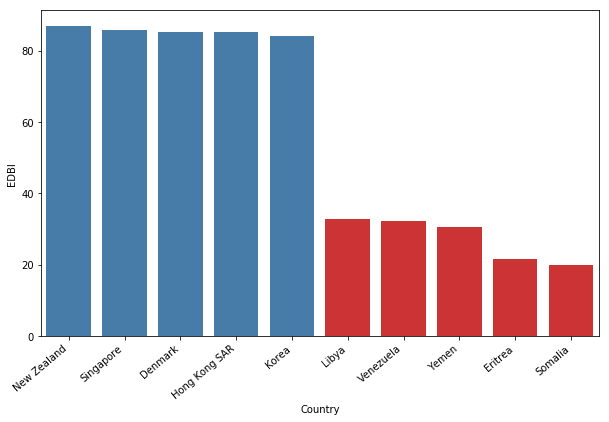

In [181]:
graph_topbottom(edbi_top5, edbi_bottom5, "EDBI")

Part 2: analysis of the Corruption Perception Index

In [182]:
# Load Corruption Perception Index (CPI) dataset and inspect the variables
df_cpi = pd.read_csv("cpi.csv", skiprows = 2)
df_cpi.columns

Index(['Country', 'ISO3', 'Region', 'CPI score 2019', 'Rank',
       'standard error ', 'Number of sources', 'Lower CI', 'Upper CI',
       'African Development Bank CPIA',
       'Bertelsmann Foundation Sustainable Governance Index',
       'Bertelsmann Foundation Transformation Index',
       'Economist Intelligence Unit Country Ratings',
       'Freedom House Nations in Transit Ratings',
       'Global Insight Country Risk Ratings',
       'IMD World Competitiveness Yearbook', 'PERC Asia Risk Guide',
       'PRS International Country Risk Guide',
       'Varieties of Democracy Project', 'World Bank CPIA',
       'World Economic Forum EOS', 'World Justice Project Rule of Law Index'],
      dtype='object')

In [183]:
# Select country and CPI variables
df_cpi= df_cpi[["Country", "CPI score 2019"]]

# Rename columns
df_cpi.columns = ["Country", "CPI"]
df_cpi.head()

,Country,CPI
0,Denmark,87
1,New Zealand,87
2,Finland,86
3,Singapore,85
4,Sweden,85


In [184]:
# Top 5 countries according to the CPI score
cpi_top5 = df_cpi.sort_values("CPI", ascending= False).head()
cpi_top5

,Country,CPI
0,Denmark,87
1,New Zealand,87
2,Finland,86
5,Switzerland,85
3,Singapore,85


In [185]:
# Bottom 5 countries according to the CPI score

cpi_bottom5 = df_cpi.sort_values("CPI", ascending= True).head()
cpi_bottom5

,Country,CPI
179,Somalia,9
178,South Sudan,12
177,Syria,13
176,Yemen,15
174,Sudan,16


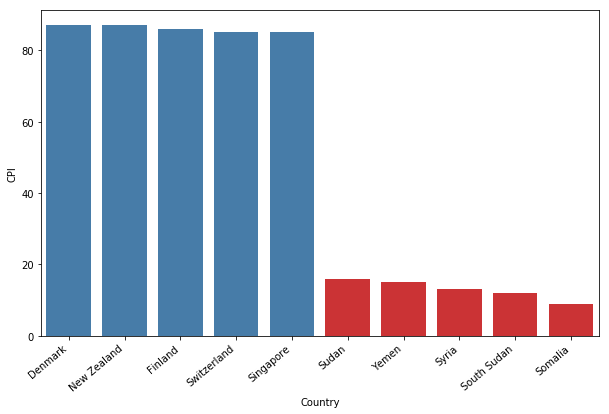

In [186]:
graph_topbottom(cpi_top5, cpi_bottom5, "CPI")

Part 3: Analysis of the relationship between the CPI and EDBI data

In [187]:
# Check the dimension of dataset
df_edbi.shape, df_cpi.shape

((189, 2), (180, 2))

In [188]:
# Subset the EDBI dataset before merging
df_edbi = df_edbi[["Country", "EDBI"]]
df_edbi.head()

,Country,EDBI
0,Afghanistan,44.20
1,Albania,66.99
2,Algeria,48.50
3,Angola,41.20
4,Antigua and Barbuda,59.85


In [189]:
# Merge the two indices: EDBI and CPI
df_merged = df_edbi.merge(df_cpi, on = "Country")
df_merged.head()

,Country,EDBI,CPI
0,Afghanistan,44.20,16
1,Albania,66.99,35
2,Algeria,48.50,35
3,Angola,41.20,26
4,Argentina,58.18,45


In [190]:
# Check if there is any missing data
df_merged.isna().sum()

Country    0
EDBI       0
CPI        0
dtype: int64

In [191]:
# Check the dimension of the merged dataset: 163 matching countries in the two datasets are retained 
df_merged.shape

(163, 3)

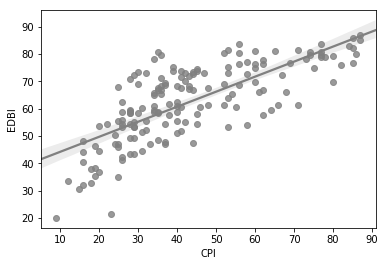

In [192]:
# Plot the indices and a linear regression model fit
sb.regplot(df_merged['CPI'], df_merged['EDBI'], color = "grey")

In [193]:
# Calculate the Pearson correlation coefficient 
np.corrcoef(df_merged['EDBI'], df_merged['CPI'])

array([[1.        , 0.74357284],
       [0.74357284, 1.        ]])

In [194]:
# Divide the CPI data into three categories using percentiles based on the distribution of the data
df_merged["CPI_categories"] = pd.qcut(df_merged["CPI"], 3, labels=["High corruption", "Some corruption", "Low corruption"])

In [195]:
# Divide the EDBI data into three categories using percentiles based on the distribution of the data
df_merged["EDBI_categories"] = pd.qcut(df_merged["EDBI"], 3, labels=["Very difficult", "Relatively difficult", "Very easy"])

In [196]:
df_merged.head()

,Country,EDBI,CPI,CPI_categories,EDBI_categories
0,Afghanistan,44.20,16,High corruption,Very difficult
1,Albania,66.99,35,Some corruption,Relatively difficult
2,Algeria,48.50,35,Some corruption,Very difficult
3,Angola,41.20,26,High corruption,Very difficult
4,Argentina,58.18,45,Some corruption,Relatively difficult


In [197]:
# Compute ranks for both CPI ranking and EDBI ranking
df_merged["CPI_rank"] = df_merged["CPI"].rank(method='max', ascending= False)
df_merged["EDBI_rank"] = df_merged["EDBI"].rank(method='max', ascending= False)
df_merged.head()

,Country,EDBI,CPI,CPI_categories,EDBI_categories,CPI_rank,EDBI_rank
0,Afghanistan,44.20,16,High corruption,Very difficult,160.0,147.0
1,Albania,66.99,35,Some corruption,Relatively difficult,102.0,72.0
2,Algeria,48.50,35,Some corruption,Very difficult,102.0,135.0
3,Angola,41.20,26,High corruption,Very difficult,139.0,151.0
4,Argentina,58.18,45,Some corruption,Relatively difficult,61.0,108.0


In [198]:
# Show countries: high corruption and easy to do business
df_merged[(df_merged["CPI_categories"] == "High corruption") & (df_merged["EDBI_categories"] == "Very easy")].sort_values("CPI_rank", ascending = False)

,Country,EDBI,CPI,CPI_categories,EDBI_categories,CPI_rank,EDBI_rank
98,Mexico,72.31,29,High corruption,Very easy,124.0,51.0
8,Azerbaijan,73.58,30,High corruption,Very easy,118.0,42.0
99,Moldova,73.13,32,High corruption,Very easy,112.0,45.0


In [199]:
# Show countries: low corruption and difficult to do business
df_merged[(df_merged["CPI_categories"] == "Low corruption") & (df_merged["EDBI_categories"] == "Very difficult")].sort_values("EDBI_rank", ascending = False)

,Country,EDBI,CPI,CPI_categories,EDBI_categories,CPI_rank,EDBI_rank
61,Grenada,53.36,53,Low corruption,Very difficult,50.0,125.0
25,Cabo Verde,54.01,58,Low corruption,Very difficult,39.0,122.0
12,Barbados,57.68,62,Low corruption,Very difficult,31.0,109.0


End of notebook